# Second Part

In [ ]:
# Start
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Load Data

In [ ]:
# load data
s6_data = pd.read_csv("S6_Data.csv")
s100_data = pd.read_csv("S100_Data.csv")
s6_data.head()

,unit_id,doc_id,rel,gender,age,school,income,party,party_ln,ideo,elections,teaparty,position_in_task,S6_rel,justification,url,off_page_count,time
0,unit_0,REP_LIE_doc6,LIE,2,3,4,3,2,2,4,1,3,1,1,"After implementation of the law, 98% of Massac...",https://en.wikipedia.org/wiki/Massachusetts_he...,0,105.615
1,unit_0,DEM_FALSE_doc1,FALSE,2,3,4,3,2,2,4,1,3,2,1,She has literally cited him in the past.,https://twitchy.com/2014/11/13/jonathan-who-na...,3,133.090
2,unit_0,LOW,LOW,2,3,4,3,2,2,4,1,3,3,2,Lincoln was assassinated in1865. Organized foo...,https://en.wikipedia.org/wiki/Formula_One,1,232.598
3,unit_0,DEM_HALFTRUE_doc3,HALFTRUE,2,3,4,3,2,2,4,1,3,4,4,"It was found by IFC that yes, water rates did ...",https://www.politifact.com/global-news/stateme...,6,152.994
4,unit_0,DEM_TRUE_doc2,TRUE,2,3,4,3,2,2,4,1,3,5,2,Ryan sounds like he really does regret ever su...,https://www.vanityfair.com/news/2019/07/paul-r...,3,122.103


## Preprocessing

Remove control questions and split data sets in all statements, democratic and republican statements grouped by party of assessor and document id to build rating mean of each statement. Remove unknown gender (1 instance).

In [ ]:
# get rid of cotroll statements
s6_data = s6_data[s6_data['rel'] != "LOW"]
s6_data = s6_data[s6_data['rel'] != "HIGH"]
s6_data = s6_data[s6_data['gender'] != -1]

s100_data = s100_data[s100_data['rel'] != "LOW"]
s100_data = s100_data[s100_data['rel'] != "HIGH"]

In [ ]:
# change party_ln: 1 = REP and 2 = DEM
s6_data['party_ln'] = s6_data['party_ln'].replace([1,2],['REP','DEM'])
s100_data['party_ln'] = s100_data['party_ln'].replace([1,2],['REP','DEM'])

In [ ]:
# aggregate
# all
s6_doc_mean_all = s6_data.groupby(['party_ln','doc_id']).agg({'S6_rel': 'mean', 'rel': 'first'})
s100_doc_mean_all = s100_data.groupby(['party_ln','doc_id']).agg({'S100_rel': 'mean', 'rel': 'first'})

# dem
s6_doc_mean_dem = s6_data[s6_data['doc_id'].str.contains('DEM', regex= True, na=False)].groupby(['party_ln','doc_id']).agg({'S6_rel': 'mean', 'rel': 'first'})
s100_doc_mean_dem = s100_data[s100_data['doc_id'].str.contains('DEM', regex= True, na=False)].groupby(['party_ln','doc_id']).agg({'S100_rel': 'mean', 'rel': 'first'})

# rep
s6_doc_mean_rep = s6_data[s6_data['doc_id'].str.contains('REP', regex= True, na=False)].groupby(['party_ln','doc_id']).agg({'S6_rel': 'mean', 'rel': 'first'})
s100_doc_mean_rep = s100_data[s100_data['doc_id'].str.contains('REP', regex= True, na=False)].groupby(['party_ln','doc_id']).agg({'S100_rel': 'mean', 'rel': 'first'})


## Mean Scores of voters

In related paper also mean scores of TRUE statements are calculated to compare scoring habbit.

In [ ]:
# mean scores voters S6
# democratic
s6_dem_dem_mean = s6_data.loc[(s6_data['doc_id'].str.contains('DEM', regex= True, na=False)) & (s6_data['party_ln']=='DEM') & (s6_data['rel'] == 'TRUE')].mean()
s6_dem_rep_mean = s6_data.loc[(s6_data['doc_id'].str.contains('DEM', regex= True, na=False)) & (s6_data['party_ln']=='REP') & (s6_data['rel'] == 'TRUE')].mean()
print('Democratic Statements')
print(s6_dem_dem_mean['S6_rel'],s6_dem_rep_mean['S6_rel'])
#republican
s6_rep_dem_mean = s6_data.loc[(s6_data['doc_id'].str.contains('REP', regex= True, na=False)) & (s6_data['party_ln']=='DEM') & (s6_data['rel'] == 'TRUE')].mean()
s6_rep_rep_mean = s6_data.loc[(s6_data['doc_id'].str.contains('REP', regex= True, na=False)) & (s6_data['party_ln']=='REP') & (s6_data['rel'] == 'TRUE')].mean()
print('Republican Statements')
print(s6_rep_dem_mean['S6_rel'],s6_rep_rep_mean['S6_rel'])


Democratic Statements
5.467741935483871 4.722222222222222
Republican Statements
5.0 5.345454545454546


The averages are first calculated for democratic assessors, then for republican assessors.

In [ ]:
# mean scores voters S100
# democratic
s100_dem_dem_mean = s100_data.loc[(s100_data['doc_id'].str.contains('DEM', regex= True, na=False)) & (s100_data['party_ln']=='DEM') & (s100_data['rel'] == 'TRUE')].mean()
s100_dem_rep_mean = s100_data.loc[(s100_data['doc_id'].str.contains('DEM', regex= True, na=False)) & (s100_data['party_ln']=='REP') & (s100_data['rel'] == 'TRUE')].mean()
print('Democratic Statements')
print(s100_dem_dem_mean['S100_rel'],s100_dem_rep_mean['S100_rel'])
#republican
s100_rep_dem_mean = s100_data.loc[(s100_data['doc_id'].str.contains('REP', regex= True, na=False)) & (s100_data['party_ln']=='DEM') & (s100_data['rel'] == 'TRUE')].mean()
s100_rep_rep_mean = s100_data.loc[(s100_data['doc_id'].str.contains('REP', regex= True, na=False)) & (s100_data['party_ln']=='REP') & (s100_data['rel'] == 'TRUE')].mean()
print('Republican Statements')
print(s100_rep_dem_mean['S100_rel'],s100_rep_rep_mean['S100_rel'])

Democratic Statements
84.54716981132076 73.23913043478261
Republican Statements
81.83636363636364 81.88888888888889


The averages are first calculated for democratic assessors, then for republican assessors. We can see that republican workers are evaluating true statements of democratic persons significantly worse than true statements from own party.

## Plots

### All statements: Boxplots of voters for S6 and S100

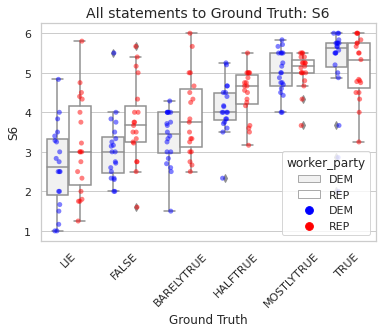

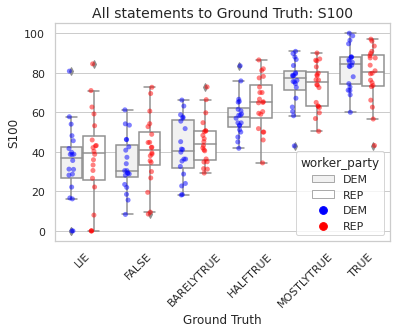

In [ ]:
# set grid lines
# it's either grid lines or xticks style='ticks'
sns.set(style='whitegrid')

# all statements 
# s6
a = s6_doc_mean_all.reset_index()

# grouped boxplots
# https://seaborn.pydata.org/examples/grouped_boxplot.html
# https://www.tutorialspoint.com/how-to-make-a-grouped-boxplot-graph-in-matplotlib

# grouped boxplots with scatterplot
#https://datavizpyr.com/grouped-boxplot-with-jittered-data-points-with-seaborn/

# easy version 
# sns.boxplot(x=a['rel'], y=a['S6_rel'],hue=a['party_ln'])

sns.boxplot(x=a['rel'],
            y=a['S6_rel'],
            hue=a['party_ln'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=a['rel'],
            y=a['S6_rel'],
            hue=a['party_ln'],
            jitter=True,
            dodge=True,
            palette=['blue','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])
            
plt.title('All statements to Ground Truth: S6',size=14)
plt.xticks(rotation=45)
plt.legend(title='worker_party')#, loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S6", size=12)
plt.show()

# s100
b = s100_doc_mean_all.reset_index()

sns.boxplot(x=b['rel'],
            y=b['S100_rel'],
            hue=b['party_ln'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=b['rel'],
            y=b['S100_rel'],
            hue=b['party_ln'],
            jitter=True,
            dodge=True,
            palette=['blue','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S100', size=14)
plt.xticks(rotation=45)
plt.legend(title='worker_party')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S100", size=12)
plt.show()

### Republican statements: Boxplots of voters for S6 and S100

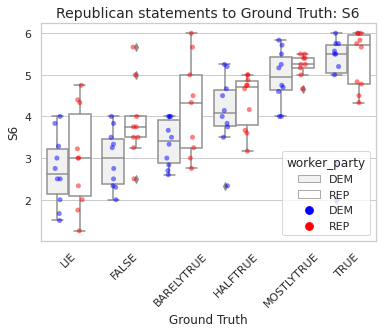

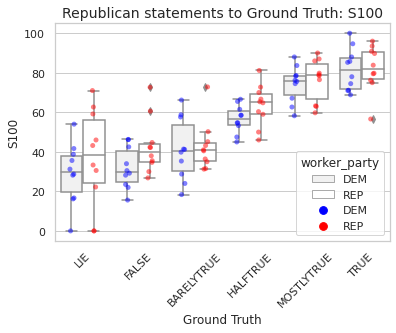

In [ ]:
# rep statements
#  s6
e = s6_doc_mean_rep.reset_index()
sns.boxplot(x=e['rel'],
            y=e['S6_rel'],
            hue=e['party_ln'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=e['rel'],
            y=e['S6_rel'],
            hue=e['party_ln'],
            jitter=True,
            dodge=True,
            palette=['blue','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])
plt.title('Republican statements to Ground Truth: S6',size=14)
plt.xticks(rotation=45)
plt.legend(title='worker_party')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S6", size=12)
plt.show()

# s100
f = s100_doc_mean_rep.reset_index()
sns.boxplot(x=f['rel'],
            y=f['S100_rel'],
            hue=f['party_ln'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=f['rel'],
            y=f['S100_rel'],
            hue=f['party_ln'],
            jitter=True,
            dodge=True,
            palette=['blue','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('Republican statements to Ground Truth: S100', size=14)
plt.xticks(rotation=45)
plt.legend(title='worker_party')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S100", size=12)
plt.show()

### Democratic statements: Boxplots of voters for S6 and S100

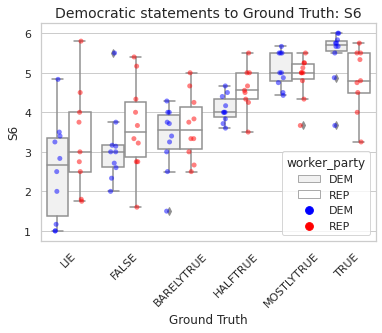

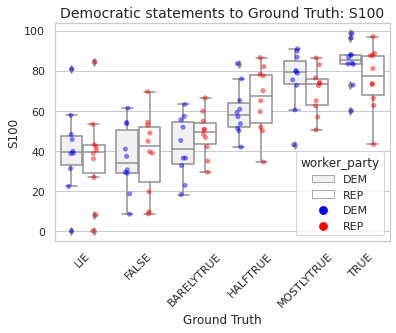

In [ ]:
# dem statements 
# s6
c = s6_doc_mean_dem.reset_index()

sns.boxplot(x=c['rel'],
            y=c['S6_rel'],
            hue=c['party_ln'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=c['rel'],
            y=c['S6_rel'],
            hue=c['party_ln'],
            jitter=True,
            dodge=True,
            palette=['blue','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])
plt.title('Democratic statements to Ground Truth: S6',size=14)
plt.xticks(rotation=45)
plt.legend(title='worker_party')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S6", size=12)
plt.show()

# s100
d = s100_doc_mean_dem.reset_index()

sns.boxplot(x=d['rel'],
            y=d['S100_rel'],
            hue=d['party_ln'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=d['rel'],
            y=d['S100_rel'],
            hue=d['party_ln'],
            jitter=True,
            dodge=True,
            palette=['blue','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('Democratic statements to Ground Truth: S100', size=14)
plt.xticks(rotation=45)
plt.legend(title='worker_party')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S100", size=12)
plt.show()

### Additional - All statements grouped by Sex: Boxplots of voters for S6 and S100

Is sex influencing rating behaviour? For that, first average scores are plotted separated by sex and then deep dive if party assessors decide differently by sex.

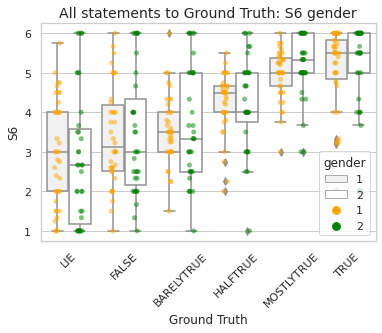

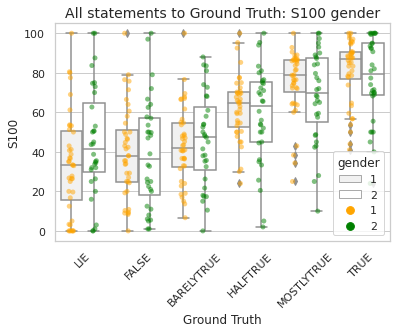

In [ ]:
# sex
s6_doc_mean_sex = s6_data.groupby(['gender','party_ln','doc_id']).agg({'S6_rel': 'mean', 'rel': 'first'})
s100_doc_mean_sex = s100_data.groupby(['gender','party_ln','doc_id']).agg({'S100_rel': 'mean', 'rel': 'first'})
# assignement
w = s6_doc_mean_sex.reset_index()
x = s100_doc_mean_sex.reset_index()

#  s6 plot
sns.boxplot(x=w['rel'],
            y=w['S6_rel'],
            hue=w['gender'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=w['rel'],
            y=w['S6_rel'],
            hue=w['gender'],
            jitter=True,
            dodge=True,
            palette=['orange','green'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S6 gender',size=14)
plt.xticks(rotation=45)
plt.legend(title='gender')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S6", size=12)
plt.show()

# s100 plot 
sns.boxplot(x=x['rel'],
            y=x['S100_rel'],
            hue=x['gender'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=x['rel'],
            y=x['S100_rel'],
            hue=x['gender'],
            jitter=True,
            dodge=True,
            palette=['orange','green'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S100 gender',size=14)
plt.xticks(rotation=45)
plt.legend(title='gender')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S100", size=12)
plt.show()

Let's see if gender and party has influence on scoring.

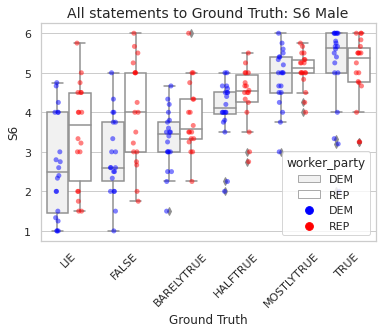

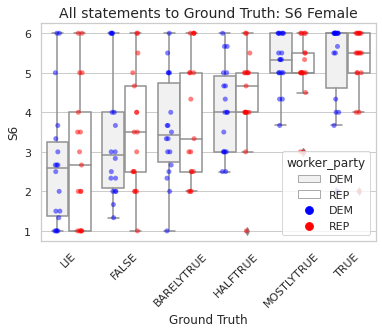

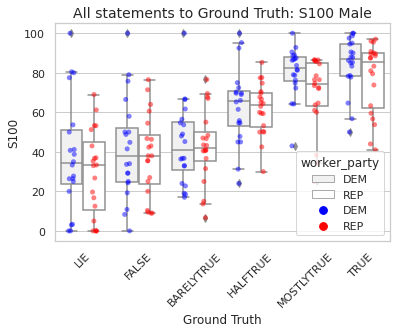

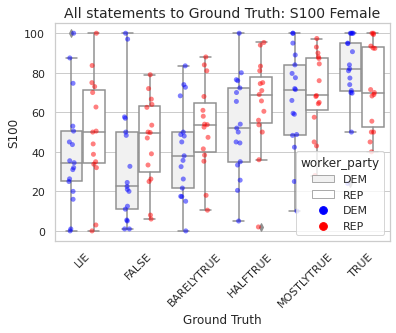

In [ ]:
# sex and party
#s6
s6_doc_mean_male = s6_data[s6_data['gender']==1].groupby(['party_ln','doc_id']).agg({'S6_rel': 'mean', 'rel': 'first'})
s6_doc_mean_female = s6_data[s6_data['gender']==2].groupby(['party_ln','doc_id']).agg({'S6_rel': 'mean', 'rel': 'first'})
# s100
s100_doc_mean_male = s100_data[s100_data['gender']==1].groupby(['party_ln','doc_id']).agg({'S100_rel': 'mean', 'rel': 'first'})
s100_doc_mean_female = s100_data[s100_data['gender']==2].groupby(['party_ln','doc_id']).agg({'S100_rel': 'mean', 'rel': 'first'})

#assignment
g = s6_doc_mean_male.reset_index()
h  = s6_doc_mean_female.reset_index()
i = s100_doc_mean_male.reset_index()
j = s100_doc_mean_female.reset_index()
#  s6 plot
#male
sns.boxplot(x=g['rel'],
            y=g['S6_rel'],
            hue=g['party_ln'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=g['rel'],
            y=g['S6_rel'],
            hue=g['party_ln'],
            jitter=True,
            dodge=True,
            palette=['blue','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S6 Male',size=14)
plt.xticks(rotation=45)
plt.legend(title='worker_party')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S6", size=12)
plt.show()
#female
sns.boxplot(x=h['rel'],
            y=h['S6_rel'],
            hue=h['party_ln'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=h['rel'],
            y=h['S6_rel'],
            hue=h['party_ln'],
            jitter=True,
            dodge=True,
            palette=['blue','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S6 Female',size=14)
plt.xticks(rotation=45)
plt.legend(title='worker_party')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S6", size=12)
plt.show()

#  s100 plot
#male
sns.boxplot(x=i['rel'],
            y=i['S100_rel'],
            hue=i['party_ln'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=i['rel'],
            y=i['S100_rel'],
            hue=i['party_ln'],
            jitter=True,
            dodge=True,
            palette=['blue','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S100 Male',size=14)
plt.xticks(rotation=45)
plt.legend(title='worker_party')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S100", size=12)
plt.show()
#female
sns.boxplot(x=j['rel'],
            y=j['S100_rel'],
            hue=j['party_ln'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=j['rel'],
            y=j['S100_rel'],
            hue=j['party_ln'],
            jitter=True,
            dodge=True,
            palette=['blue','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S100 Female',size=14)
plt.xticks(rotation=45)
plt.legend(title='worker_party')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S100", size=12)
plt.show()

No relation can be found in rating behaviour.

### Additional - All statements grouped by Income: Boxplots of voters for S6 and S100

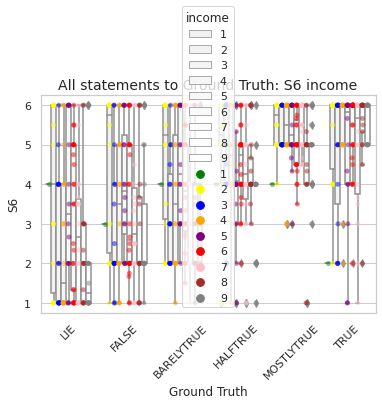

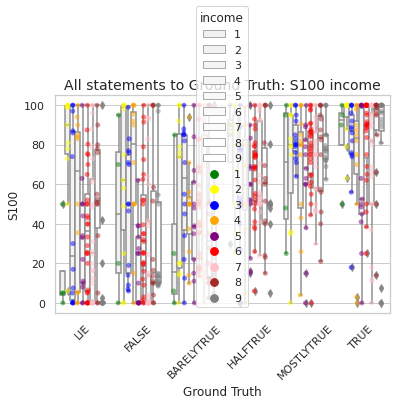

In [ ]:
# income
s6_doc_mean_income = s6_data.groupby(['income','party_ln','doc_id']).agg({'S6_rel': 'mean', 'rel': 'first'})
s100_doc_mean_income = s100_data.groupby(['income','party_ln','doc_id']).agg({'S100_rel': 'mean', 'rel': 'first'})
# s100
l = s6_doc_mean_income.reset_index()
k = s100_doc_mean_income.reset_index()

#  s6 plot
sns.boxplot(x=l['rel'],
            y=l['S6_rel'],
            hue=l['income'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=l['rel'],
            y=l['S6_rel'],
            hue=j['income'],
            jitter=True,
            dodge=True,
            palette=['green','yellow','blue','orange','purple','red','pink','brown','grey'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S6 income',size=14)
plt.xticks(rotation=45)
plt.legend(title='income')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S6", size=12)
plt.show()

# s100 plot 
sns.boxplot(x=k['rel'],
            y=k['S100_rel'],
            hue=k['income'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=k['rel'],
            y=k['S100_rel'],
            hue=k['income'],
            jitter=True,
            dodge=True,
            palette=['green','yellow','blue','orange','purple','red','pink','brown','grey'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S100 income',size=14)
plt.xticks(rotation=45)
plt.legend(title='income')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S100", size=12)
plt.show()

Boxplots not optimal - split per income and by party might deliver more insights.

### Additional - All statements grouped by Education: Boxplots of voters for S6 and S100

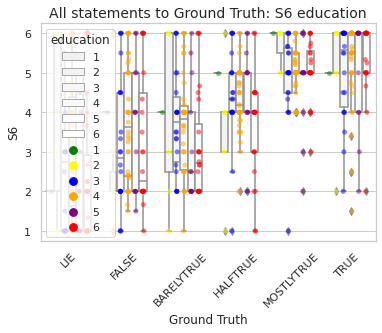

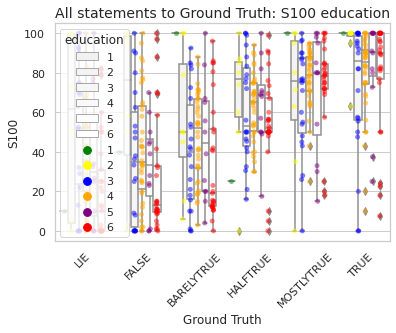

In [ ]:
# education
s6_doc_mean_school = s6_data.groupby(['school','party_ln','doc_id']).agg({'S6_rel': 'mean', 'rel': 'first'})
s100_doc_mean_school = s100_data.groupby(['school','party_ln','doc_id']).agg({'S100_rel': 'mean', 'rel': 'first'})
# s100
m = s6_doc_mean_school.reset_index()
n = s100_doc_mean_school.reset_index()

#  s6 plot
sns.boxplot(x=m['rel'],
            y=m['S6_rel'],
            hue=m['school'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=m['rel'],
            y=m['S6_rel'],
            hue=m['school'],
            jitter=True,
            dodge=True,
            palette=['green','yellow','blue','orange','purple','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S6 education',size=14)
plt.xticks(rotation=45)
plt.legend(title='education')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S6", size=12)
plt.show()

# s100 plot 
sns.boxplot(x=n['rel'],
            y=n['S100_rel'],
            hue=n['school'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=n['rel'],
            y=n['S100_rel'],
            hue=n['school'],
            jitter=True,
            dodge=True,
            palette=['green','yellow','blue','orange','purple','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S100 education',size=14)
plt.xticks(rotation=45)
plt.legend(title='education')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S100", size=12)
plt.show()

Same as for income, boxplots per education level and party would be more suitable. Non conclusions possible.

### Additional - All statements grouped by Age: Boxplots of voters for S6 and S100

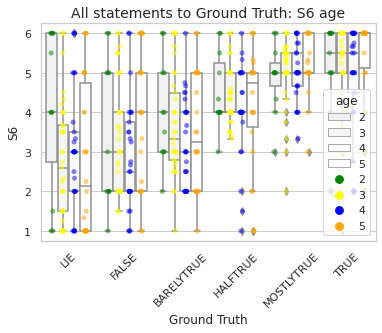

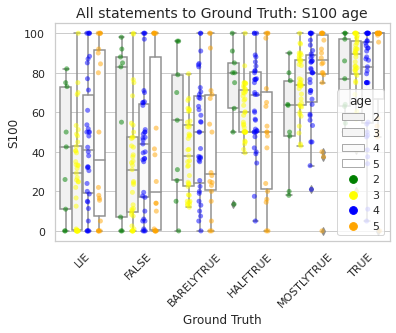

In [ ]:
# age
s6_doc_mean_age = s6_data.groupby(['age','party_ln','doc_id']).agg({'S6_rel': 'mean', 'rel': 'first'})
s100_doc_mean_age = s100_data.groupby(['age','party_ln','doc_id']).agg({'S100_rel': 'mean', 'rel': 'first'})
# s100
o = s6_doc_mean_age.reset_index()
p = s100_doc_mean_age.reset_index()

#  s6 plot
sns.boxplot(x=o['rel'],
            y=o['S6_rel'],
            hue=o['age'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=o['rel'],
            y=o['S6_rel'],
            hue=o['age'],
            jitter=True,
            dodge=True,
            palette=['green','yellow','blue','orange','purple','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S6 age',size=14)
plt.xticks(rotation=45)
plt.legend(title='age')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S6", size=12)
plt.show()

# s100 plot 
sns.boxplot(x=p['rel'],
            y=p['S100_rel'],
            hue=p['age'],
            color='white',
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

sns.stripplot(x=p['rel'],
            y=p['S100_rel'],
            hue=p['age'],
            jitter=True,
            dodge=True,
            palette=['green','yellow','blue','orange','purple','red'],
            alpha=0.5,
            order=['LIE','FALSE','BARELYTRUE','HALFTRUE','MOSTLYTRUE','TRUE'])

plt.title('All statements to Ground Truth: S100 age',size=14)
plt.xticks(rotation=45)
plt.legend(title='age')
plt.xlabel("Ground Truth", size=12)
plt.ylabel("S100", size=12)
plt.show()

Same as for education, boxplots per agelevel and party would be more suitable. Non conclusions possible.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7373d0f7-b35e-460a-b7ec-c43f8d39233d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>